# Week 6 - Performance metrics

For example, consider the Iris dataset we have seen before. We will focus on a single type of iris, namely *iris versicolor*, and we will attempt to classify each point as to whether it is an *iris versicolor* or not. With a simple linear suppport vector classifier (briefly mentioned last week but otherwise found in the bonus notebook), we can produce the following **confusion matrix**, which is a matrix of the true positive, false positive, true negative and false negative rates. Here we have evaluated the prediction on all of the Iris dataset.



<hr style="border:2px solid gray">

# Outline <a id='outline'></a>
1. [Section One: Performance metrics in Classification](#section-1)
1. [Section Two: A toy model for ROC-AUC](#section-2)
1. [Section Three: Performance metrics in Regression](#section-3)
1. [Section Four: The MNIST and California Housing datasets](#section-4)
1. [Section Five: Exercises](#section-5)

<hr style="border:2px solid gray">

# Section One: Performance metrics in Classification [^](#outline) <a id='section-1'></a>

So far you have been introduced to ML concepts for both classification and regression. We have tracked the performance for some classification models with a simple **performance metric**, specifically classification accuracy. However, this are far from the be-all and end-all of evaluating the performance of machine learning algorithms. This week we will introduce a couple important metrics to evaluate the performance of your algorithms including **ROC-AUC** for classification and **goodness of fit** for regression.

When we look at a classification problem, we have previosly looked at the percentage of test points that were correctly classified. However, we can define things in a way that gives us a bit more insight into what is actually going on. For a binary classification problem with $y_i \in \{+1, -1\}$, we can define four rates describing how good the classification is:

* **True positive (TP)**: Samples in the +1 class that are correctly identified as the +1 class
<br>

* **False positive (FP)**: Samples in the -1 class that are incorrectly identified as the +1 class
<br>

* **True negative (TN)**: Samples in the -1 class that are correctly identified as the -1 class
<br>

* **False negative (FN)**: Samples in the +1 class that are incorrectly identified as the -1 class

This tells us not only if the model prediction is accurate i.e. predicts the correct class, but how it makes mistakes. You'll recognise false positives as our type I errors, and false negatives as type II errors, as we discussed in Week 2. 


<div>
<img src=Week6_plots/confusion_matrix.png align='center' width=600>
</div>

*Confusion matrix for classifying IRIS into *versicolor* and not *versicolor*. The entire 150 sample dataset is used.*


We can define derived quantities from these that express different things about the model:

* **Accuracy**: as we have seen already, this is the proportion of samples that are classified correctly
<br>

\begin{equation*}
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation*}
<br>

* **Fall-out or False Positive Rate**: the proportion of points with $y$ = -1 that are incorrectly predicted as $\hat{y}$ = +1
<br>

\begin{equation*}
\text{Fall-out} = \frac{\text{+1 predictions with true class -1}}{\text{Points with true class -1}} = \frac{FP}{FP + TN}
\end{equation*}
<br>

* **Precision**: the proportion of points with predicted to have class +1 that have true class +1 i.e. fraction of predictions of class +1 that are correct
<br>

\begin{equation*}
\text{Precision} = \frac{\text{+1 class predictions with true class +1}}{\text{Predictions of class +1}} = \frac{TP}{TP + FP}
\end{equation*}
<br>

* **Recall or True Positive Rate**: fraction of points with true class +1 that are correctly identified as class +1
<br>

\begin{equation*}
\text{Recall} = \frac{\text{+1 class predictions with true class +1}}{\text{Points with true class +1}} = \frac{TP}{TP + FN}
\end{equation*}

In general, there is a trade-off between **precision** and **recall**. This is not necessarily obvious, but can be seen for an example 1D case. The classifier in this case assigns the -1 class to samples with an $\mathbf{X}$ value left of the decision boundary, and the +1 class to samples with an $\mathbf{X}$ value to the right of the decision boundary.

<img src='Week6_plots/decision_boundary_1_example.png' align='center' height=200>

*Example binary classifier with one input feature. The decision boundary at this case is set at 0.05.*

In this example, the prediction of this classifier can be represented as follows:

| | Correct prediction | Incorrect prediction |
|-|-|-|
| Class +1 | 8 | 1 |
| Class -1 | 7 | 3 |

For this decision boundary, the precision is equal to 8/9 and the recall is equal to 8/11.

We can look at what these values are for a different decision boundary:

<img src='Week6_plots/decision_boundary_2_example.png' align='center' height=200>

*Example binary classifier with one input feature. The decision boundary at this case is set at 0.25.*

In this example, the prediction of this classifier can be represented as follows:

| | Correct prediction | Incorrect prediction |
|-|-|-|
| Class +1 | 7 | 0 |
| Class -1 | 8 | 4 |

For this decision boundary, the precision is equal to 1 and the recall is equal to 7/11.

While the precision has improved with the different choice of decision boundary, the recall has decreased. 

We can see the precision and recall as a function of decision boundary in the figure below:

<img src=Week6_plots/decision_boundary_precision_recall.png align='center' height=400>

*Precision and recall as a function of decision boundary for the 1D model shown prior.*

Choice of decision boundary therefore depends on whether you value precision or recall more.

* When testing for an infectious disease, it is important your test is as sensitive to the disease as possible, even if it also returns false positive results. Higher recall is preferred.
* When classifying emails as spam or not, it is important that any emails flagged as spam actually are spam; if an email is flagged as spam, it better be spam, otherwise you might miss important emails. Higher precision is preferred.

There is another metric that is very commonly used to evaluate the performance of a classifier, which we will cover next.

## The Receiver Operating Characteristic (ROC) curve

The receiver operating characteristic (ROC) curve is the plot of fallout (false positive rate) against recall (true positive rate), as a function of decision boundary value. This originated in World War II, to help radar receivers analyse the classification accuracy for discriminating signal and noise in radar detection. In general, it is used to evaluate the effectiveness of a classifier. 

* Randomly classifying samples produces a classifier where the ROC curve is a straight line with gradient 1
* The best possible classifier has a fall-out equal to 0 and a recall equal to 1
* The worst possible classifier has a fall-out equal to 1 and a recall equal to 0. 

These cases are illustrated in the figure below. You'll see this is similar to the plots we constructed for critical regions in hypothesis testing in Week 2, where we plotted the type I error against the power. 





<div>
<img src=Week6_plots/roc_curve_schematic_.png align='center' width=500>
<div>

*Schematic of a receiver operator characteristic (ROC) curve. The diagonal dashed line indicates the performance of a random classifier. Better classifiers are closer to the top left of the plot, and worse classifiers are closer to the bottom right.* 

The most common way to use this curve to evaluate a given classifier is to calculate the area-under-curve (AUC). 
* This is referred to as the **AUC score**
* Complete metric for the area under the ROC curve is referred to as **ROC-AUC**

* A perfect classifier has a ROC-AUC score of 1 
* A random classifier has a ROC-AUC score of 0.5 
* The worst possible classifier has a ROC-AUC score of 0. 

We will use ROC-AUC later in this notebook to evaluate the success of classifiers.

## Summary

In this section, we have covered several performance metrics for classification, including:

* Identifying true positive, false positive, true negative and false negative counts
* Accuracy, fall-out, precision and recall
* The receiver operating characteristic (ROC) curve and the ROC-AUC score

In the following section, you will see performance metrics that we can use for regression.

<hr style="border:2px solid gray">

# Section Two: A toy model to practise ROC-AUC [^](#outline) <a id='section-2'></a>





We will now see how we can in practise look at ROC curves and calculate the ROC-AUC score. To do this, we will use a real physics dataset.

The SoLid experiment is searching for a new type of neutrino, that can only be produced by neutrino oscillations. To do this, it measures antineutrino flux from a nuclear reactor. Antineutrinos are detected via an inverse beta decay reaction:

$$\bar{\nu}_e + \text{p} \to \text{e}^+ + \text{n}$$

In this experiment, both the positron and the neutron need to be detected in order to detect this reaction. This is done with two different scintillators: one which can detect positrons that annihilate, and one that detects neutrons through a capture reaction. This results in two very different readout waveforms, which are referred to as electromagnetic signal (ES) and nuclear signal (NS) events for positrons and neutrons respectively. 

Both the positron and neutron reactions produce scintillation light. This is converted to signals as follows:

* Light is detected using photo-detectors called silicon photomultipliers, which are a form of p-n junction such that light is absorbed through the photoelectric effect and results in a current flowing across the junction
<br>

* The voltage is recorded and sampled using an analogue-to-digital converter, so the signal can be analysed. 
<br>

* Each waveform is recorded in ADC count, which is proportional to the voltage measured across the photodetector. 
<br>

* Waveforms are recorded when the measured ADC rises above a specific threshold value for a sufficient number of samples, which is referred to as the **threshold** and the **time over threshold** of the trigger.

We can characterise the waveforms by three metrics: peak value, sum value, and time over threshold. These correspond to the maximum value of the waveform, the sum of all of the waveform samples, and the number of samples the waveform is above the triggering threshold. Example ES and NS waveforms can be see in the figure below.

<img src=Week6_plots/ns_es_example.png align='center' height=300>

*NS and ES signal waveforms. In general, NS waveforms are much longer than ES waveforms.*

The data for you to use consists of 150 data points from each class, where each data point has the three input features described above. The data is provided in a .npy file, which can be loaded as follows:

In [4]:
import numpy as np

waveforms_data = np.load('nf_waveforms_dset.npy', allow_pickle = True).item()

The waveforms themselves are not included in this file, just the three descriptive features. Class label 0 corresponds to an NS waveform, and class label 1 corresponds to an ES waveform. We can print the keys of the dictionary:

In [5]:
print(waveforms_data.keys())

dict_keys(['data', 'target', 'feature_names', 'target_names'])


This format should be familiar from the other datasets we have looked at. 

We can prepare a training dataset as we normally do from this data, to see what kind of ROC curve we can produce using a support vector classifier.

In [6]:
from sklearn.model_selection import train_test_split

X = waveforms_data['data']
y = waveforms_data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

Now we define and fit two support vector classifiers, so we can compare ROC curves:

In [7]:
from sklearn.svm import SVC

svc1 = SVC(C = 1, kernel = 'rbf')
svc2 = SVC(C = 1, kernel = 'sigmoid')

svc1.fit(X_train, y_train)
svc2.fit(X_train, y_train)

SVC(C=1, kernel='sigmoid')

sklearn implements a function called ```roc_curve``` that will produce the false positive rate, true positive rate, and decision thresholds corresponding to those rates from true data and the output of the model decision function. In general, an sklearn model decision function can be accessed as ```model.decision_function```. For example, to get the ROC curve for our SVC, we do the following:

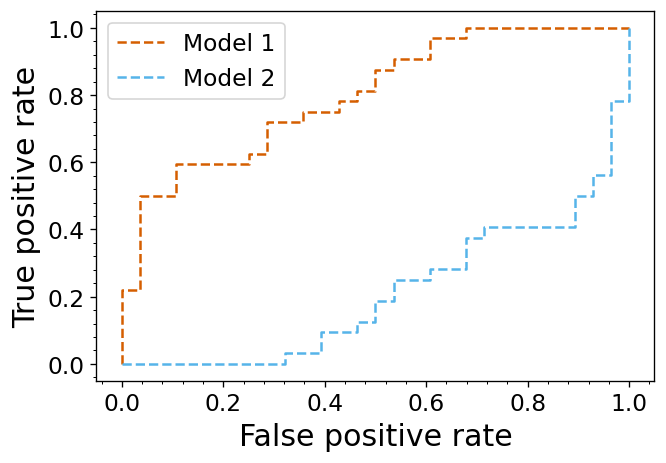

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

y_score1 = svc1.decision_function(X_test) # Calculate scores for test points
y_score2 = svc2.decision_function(X_test) # Calculate scores for test points

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_score1) # Find ROC curve values
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)

fig, ax = plt.subplots(1,1,figsize = (6,4), dpi = 120)

ax.plot(fpr1, tpr1,color='#D55E00', label='Model 1',ls='--') # Plot the ROC curve
ax.plot(fpr2, tpr2, color='#56B4E9', label = 'Model 2', ls = '--')
ax.set_xlabel('False positive rate',fontsize = 18)
ax.set_ylabel('True positive rate', fontsize = 18)
ax.tick_params(which='both',labelsize = 14)
ax.legend(loc='upper left',fontsize = 14)
ax.xaxis.set_minor_locator(MultipleLocator(0.04))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))

Finally, we can calculate the ROC-AUC score using the ```roc_auc_score``` function in sklearn:

In [9]:
from sklearn.metrics import roc_auc_score

print('Model 1 ROC-AUC: {:.3f}'.format(roc_auc_score(y_test, y_score1)))
print('Model 2 ROC-AUC: {:.3f}'.format(roc_auc_score(y_test, y_score2)))


Model 1 ROC-AUC: 0.799
Model 2 ROC-AUC: 0.210


We can also do both of these steps in one, using sklearn's ```RocCurveDisplay.from_estimator```. This produces a nicely labelled plot and labels the curve with the ROC-AUC score.

Text(0.5, 1.0, 'Model 2')

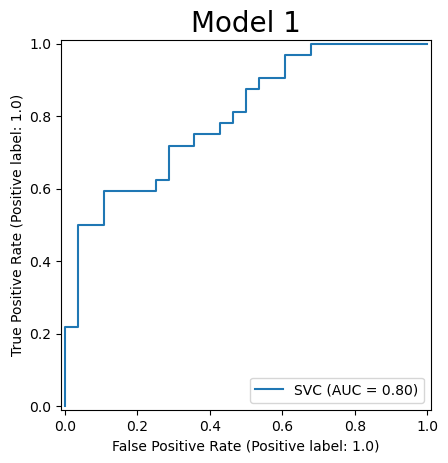

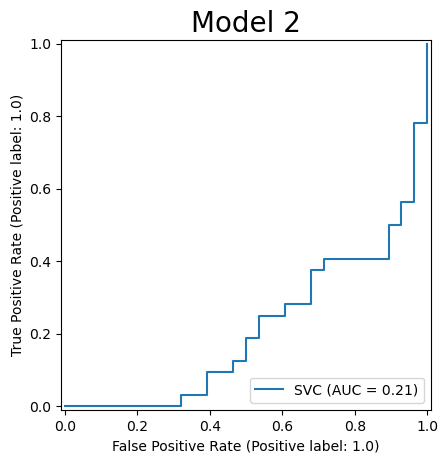

In [10]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(svc1, X_test, y_test)
plt.gca().set_title('Model 1',fontsize = 20)
RocCurveDisplay.from_estimator(svc2, X_test, y_test)
plt.gca().set_title('Model 2',fontsize= 20)

<div style="background-color:#C2F5DD">

### Example

Now you have seen how to calculate ROC-AUC scores and plot a ROC curve using sklearn, try varying your hyperparameters and seeing what ROC curves and ROC-AUC scores you get. 

* Vary your hyperparameters, e.g. your kernel and your value of C
* Plot your best ROC-AUC curve

Record your results in a pandas DataFrame alongside the hyperparameters you used.

Note: we can calculate a ROC curve for a kNN classifier, but it does not implement a ```decision_function```. However, from the ```roc_curve``` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) you can see that rather than passing the output of a decision function, we can pass a list of probabilities of the positive class. From a k-NN classifier, we can obtain this using the ```predict_proba``` function. This returns an array of shape ($n_{\text{samples}}$, $n_{\text{classes}}$) where each element is the probability of the relevant class for that sample. 

We need to pass the probability of the positive class, which corresponds to the second column: ```knn.predict_proba(X_test)[:,1]```. We can then pass this to ```roc_curve``` and ```roc_auc_score``` with ```y_test``` to calculate the score. You can read more about ```predict_proba``` in the KNeighborsClassifier [documentation]((https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The ```RocCurveDisplay``` will automatically do this, so if you use that function you do not need to worry about this.

As we have done before, we will do some hyperparameter loops to to find some good values. We will first try an example, then run a loop.

In [11]:
# Define your hyperparameters, vary these

kernel = 'rbf'
C = 100

In [12]:
# Define and fit your model

svc = SVC(C = C, kernel = kernel)
svc.fit(X_train, y_train)

SVC(C=100)

In [13]:
# Calculate scores for test data

y_score = svc.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

auc_score = roc_auc_score(y_test, y_score)

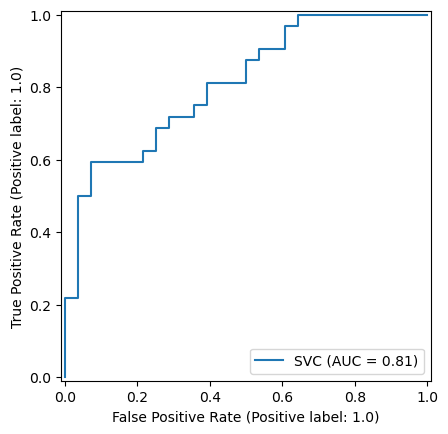

In [14]:
# Calculate ROC curve and ROC-AUC score

RocCurveDisplay.from_estimator(svc, X_test, y_test)

After training a model, we can log the hyperparameters and the ROC-AUC score in a pandas DataFrame.

In [15]:
import pandas as pd

results_df = pd.DataFrame(np.array([[kernel,C,auc_score]]),columns=['kernel','C','roc-auc-score'])

Now we will loop over some hyperparameter options, although only a few here to give an example of the kind of hyperparameter search you could do.

In [16]:
import pickle

list_of_C = [1, 10, 100]
list_of_kernel = ['rbf','poly','linear']

best_auc_score = 0.0

list_of_hparams = [(C, k) for C in list_of_C for k in list_of_kernel]

for C, kernel in list_of_hparams:
    toy_svc = SVC(kernel = kernel, C = C)
    toy_svc.fit(X_train, y_train)
    y_score = toy_svc.decision_function(X_test)
    auc_score = roc_auc_score(y_test, y_score)
    if auc_score > best_auc_score:
        best_auc_score = auc_score
        with open('svm_auc_model.pkl','wb') as f:
            pickle.dump(toy_svc, f)
    model_df = pd.DataFrame(np.array([[kernel, C, auc_score]]),columns=['kernel','C','roc-auc-score'])
    results_df = pd.concat([results_df, model_df])

<div style="background-color:#C2F5DD">


Display the ROC curve for your best performing model in the cell below.

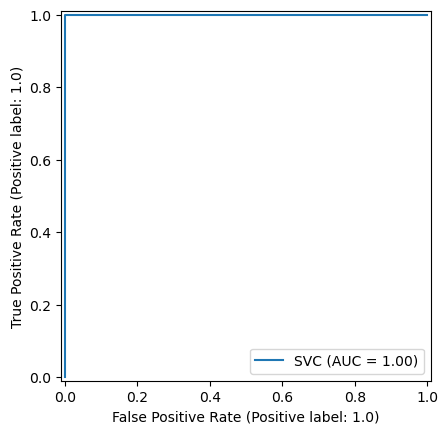

In [17]:
with open('svm_auc_model.pkl','rb') as f:
    model = pickle.load(f)
    
RocCurveDisplay.from_estimator(model, X_test, y_test)

You should find it is possible to get a perfect AUC score on this data. In fact, any model with a linear kernel should be able to get a perfect ROC-AUC score as this data is linearly separable.

<div style="background-color:#C2F5DD">

End of example

## Summary

In this section, we have discussed how to use ROC-AUC on some simple data, including:

* How to calculate true positive rate and false positive rate using `sklearn`
* How to calculate ROC-AUC scores
* How to plot ROC curves

In the next section, we will discuss performance metrics for regression.

<hr style="border:2px solid gray">

# Section Three: Performance metrics for Regression [^](#outline)<a id='section-3'></a>
 




So far we have only applied classification techniques. When we try to solve regression problems, we need different metrics as a classification accuracy or a ROC curve are not applicable for a regression problem. 

## Residuals, mean absolute error and mean squared error

Many metrics for evaluating regression performance depend on the **residuals** between prediction and expected values. This is the difference between the predicted and expected values; for a regression model prediction $\hat{y}_i = f(\mathbf{X}_i)$ and a test point ($\mathbf{X}_i$, $y_i$), the residual is given as $y_i - \hat{y}_i$. The order of subtraction doesn't generally matter, as the majority of metrics are sign-independent. 

You may notice that this description of residuals differs from what you saw in Week 2, where we weighted the residuals by the uncertainty on the measurement $y_i$, labelled as $\sigma_i$. Implicitly, here we instead assume that $\sigma_i$ has the same value for all of the measurements and so each residual simply has a constant scaling factor. Because we care only about minimising our functions of the residuals, we can then safely neglect this factor.

Mean absolute error, mean squared error and root-mean squared error are all dependent on the residuals. These are each defined as follows:

\begin{align*}
\text{Mean absolute error (MAE)}:\qquad\qquad & \text{MAE} = \frac{1}{N}\sum_{i = 1}^N|y_i - \hat{y}_i| \\[10pt]
\text{Mean squared error (MSE)}:\qquad\qquad & \text{MSE} = \frac{1}{N}\sum_{i = 1}^N(y_i - \hat{y}_i)^2 \\[10pt]
\text{Root-mean squared error (RMSE)}:\qquad\qquad & \text{RMSE} = \sqrt{\frac{1}{N}\sum_{i = 1}^N(y_i - \hat{y}_i)^2} \\
\end{align*}

The figure below shows residuals with some example data.

<div>
<img src='Week6_plots/residuals.png' width=700>
</div>

*Illustration of residuals. The mean absolute error, mean squared error, and root-mean squared error all depend on these values.*

Which of these is best? It depends on the specific case. There are several things to consider:

* Is the metric the same scale/units as the data? 
* Is the metric differentiable? This is important for many optimisation algorithms
* Is the metric robust against outliers?

Both MAE and RMSE have the same units as the $y$ values, while MSE does not. This makes it harder to interpret than the other metrics.

Both MSE and RMSE are differentiable, as they are expressed as continuous functions of the residuals, whereas MAE is a discontinuous function of the residuals and so is harder to differentiate. 

Because MSE and RMSE are dependent on the square of the residuals, larger errors receive a significantly heavier penalty. This is not the case for MAE; higher errors are still penalised, but not as much as for MSE and RMSE.



## Coefficient of determination $R^2$

So far, we have looked at errors that are dependent on the scale of the data; what a good value of RMSE is depends intrinsicly on how large your data values are. There are other metrics we can use to assess model performance that are independent of the model scale. 

One example of such a metric is the **coefficient of determination**, also referred to as $R^2$. This metric compares the performance of the model against a model that just predicts the mean of the training data; in other words, it tells you how much the model can explain the variance of the data. 

This is defined as:

\begin{equation*}
R^2 = 1 - \frac{\sum_{i = 1}^N(y_i - \hat{y}_i)^2}{\sum_{i = 1}^N (y_i - \bar{y})^2},
\end{equation*}

where symbols are defined as:

* $y_i$ is the target for the test point $\mathbf{X}_i$
<br>

* $\hat{y}_i$ is the model prediction for the test point $\mathbf{X}_i$
<br>

* $\bar{y}$ is the mean of the training targets

A model that predicts only the mean of the data has an $R^2$ of 0. A perfect prediction has an $R^2$ equal to 1. The value can become arbitrarily negative as model prediction can be arbitrarily bad.

<div>
<img src='Week6_plots/r2_illustration_final.png' width=600>
</div>

*Illustration of the two components to the coefficient of determination. $R^2$ tells us if our model prediction does better than predicting the mean of the data.*

## Goodness of fit

We have previously discussed goodness of fit in the context of traditional fitting, but we can apply similar concepts to evaluate the performance of ML regression models. Specifically, we can use tests such as the Kolmogorov-Smirnov test to see how similar the distribution of the real data is compared to our predictions. 

Like we talked about for Kolmogorov-Smirnov tests in Week 2, we can construct separate cumulative distribution functions for the test data and our model prediction on the test data. Then, we can calculate the Kolmogorov-Smirnov statistic to characterise how similar those two distribution functions are, which then gives us a measure of how well our model generalises from the training data to the test data. 

If we have overfitted on our training data, then the difference between these two cumulative distributions will be large and the p-value associated with the Kolmogorov-Smirnov test will be small. 

We can do this test using `kstest` from `scipy.stats`. We will demonstrate this using the some data generated according to a polynomial with unknown degree, with Gaussian random noise. We will start by loading in the data and splitting into training and test datasets. 

In [18]:
from scipy.stats import kstest
import pandas as pd

poly_df = pd.read_hdf('poly_data.h5')

X, y = poly_df['input'].values, poly_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, train_size = 0.8, test_size = 0.2, random_state = 1)

Now we want to train two models: one that generalises well between training and test data, and one that overfits to the training data. We will do this using a polynomial kernel and an `rbf` kernel respectively.

In [19]:
from sklearn.svm import SVR

poly_model = SVR(kernel='poly',degree=4,epsilon=10,coef0=2,C=1)
rbf_model = SVR(kernel='rbf',gamma = 20, coef0=2, epsilon = 10, C = 100)

poly_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)

SVR(C=100, coef0=2, epsilon=10, gamma=20)

Now that we have defined and trained our two models, we can plot the prediction of both models along with both the training and test data, to get a first impression of any overfitting.

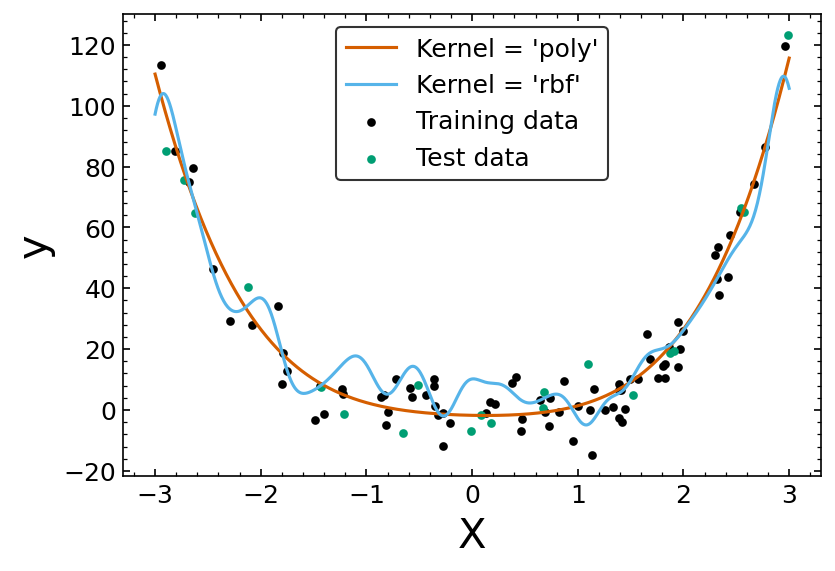

In [20]:
fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)

X_plot = np.linspace(-3,3,1000).reshape(-1,1)

ax.plot(X_plot,poly_model.predict(X_plot), color='#D55E00', label = "Kernel = 'poly'")
ax.plot(X_plot, rbf_model.predict(X_plot), color='#56B4E9',label = "Kernel = 'rbf'")
ax.scatter(X_train, y_train, color='black',label='Training data', s = 10)
ax.scatter(X_test, y_test, color='#009E73',label='Test data', s = 10 )
ax.set_xlabel('X',fontsize = 20)
ax.set_ylabel('y',fontsize = 20)
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(4))
ax.tick_params(which='both',labelsize = 12,direction='in',top=True,right=True)
ax.legend(loc='upper center',fontsize = 12, edgecolor='black')

For the `rbf` kernel, it clearly looks like we have some overfitting on the training data, given the specific shape of our prediction curve. We can now test if the empirical cumulative distribution of our model prediction is consistent with that of the test data, using `kstest`. 

In [18]:
print('poly kernel model:')
print(kstest(poly_model.predict(X_test), y_test))
print('')

print('rbf kernel model')
print(kstest(rbf_model.predict(X_test), y_test))

poly kernel model:
KstestResult(statistic=0.15, pvalue=0.9831368772656193, statistic_location=4.9360914108843055, statistic_sign=1)

rbf kernel model
KstestResult(statistic=0.35, pvalue=0.17453300569806826, statistic_location=8.069743415063959, statistic_sign=-1)


As you can see from the `kstest` results, the maximum distance between the two cumulative distributions is more than twice the size for the rbf kernel model than for the polynomial kernel model, with a corresponding p-value of 0.175 vs 0.983 for the polynomial kernel. 

In other words, these results tell us that for the rbf model, there is a 17.5% chance that the model is correctly describing the distribution of the test data, whereas there is a 98.3% chance the polynomial model is correctly describing the test data distribution. Of course, this doesn't mean we are necessarily correctly describing whatever the underlying model of the data is, only that our model correctly describes the test data distribution.

## A toy model to practise

Once again you will have an opportunity now to practise using some of the regression metrics on some toy data. We will use some random polynomial data, which is saved in `poly_data.h5`. We can quickly visualise this, then set up or training/test split:

Text(0.5, 1.0, 'Polynomial data')

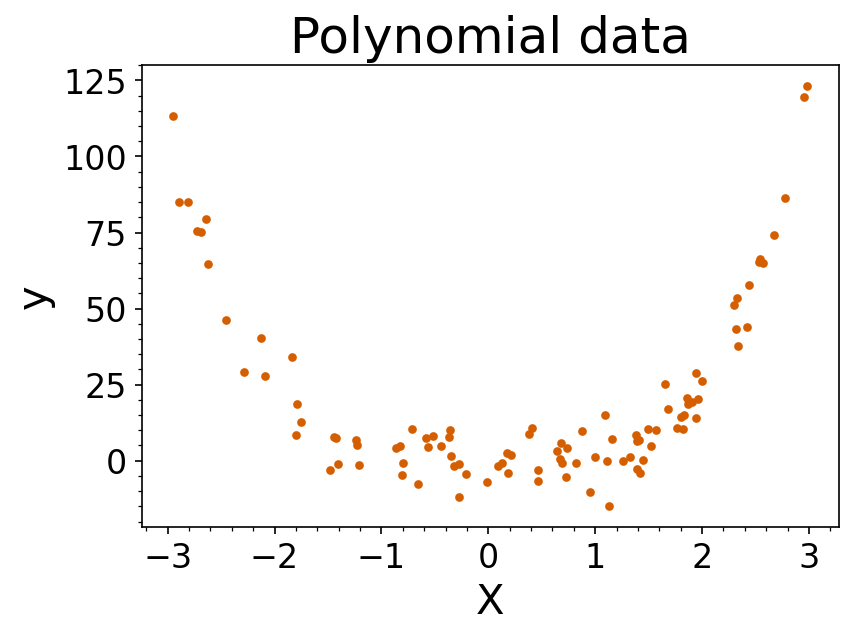

In [21]:
poly_df = pd.read_hdf('poly_data.h5')

# Plot the data

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
ax.scatter(poly_df['input'],poly_df['target'], color='#D55E00', s = 10)
ax.set_xlabel('X',fontsize = 20)
ax.set_ylabel('y',fontsize = 20)
ax.tick_params(which='both',labelsize = 16)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_title('Polynomial data',fontsize = 24)



In [22]:
# Training test split
X, y = poly_df['input'].values, poly_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size = 0.2, random_state = 1)

Define a support vector regression model:

In [23]:
from sklearn.svm import SVR

C = 100
epsilon = 5
kernel = 'linear'

svr = SVR(C = C, epsilon = epsilon, kernel = kernel)

svr.fit(X_train, y_train)

SVR(C=100, epsilon=5, kernel='linear')

Mean absolute error, mean squared error, root mean squared error, and the coefficient of determination are all defined in sklearn as `mean_absolute_error`, `mean_squared_error`, `root_mean_squared_error`, and `r2_score` respectively.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean absolute error : {}".format(mae))
print("Mean squared error : {}".format(mse))
print("Root-mean squared error : {}".format(rmse))

r2 = r2_score(y_test, y_pred)

print("R2 score : {}".format(r2))

Mean absolute error : 28.588246817277593
Mean squared error : 1825.4586832605576
Root-mean squared error : 42.72538687081204
R2 score : -0.34754988428248734


Finally, we can perform our Kolmogorov-Smirnov test:

In [25]:
# Code block for goodness of fit tests

kstest(y_pred, y_test)

KstestResult(statistic=0.5, pvalue=0.012298612583953778, statistic_location=14.623506292457018, statistic_sign=1)

<div style="background-color:#C2F5DD">

### Example

Now you have seen how to these metrics for regression using SVR, try varying your hyperparameters and see what values of performance metrics you get. 

* Vary your hyperparameters, e.g. your kernel and your value of C
* Record your results in a pandas DataFrame, including the hyperparameters you used.


In [23]:
# Define your hyperparameters; vary these

C = 100
epsilon = 5
kernel = 'linear'

In [24]:
# Define and fit your model

svr = SVR(C = C, epsilon = epsilon, kernel = kernel)

svr.fit(X_train, y_train)


SVR(C=100, epsilon=5, kernel='linear')

In [25]:
# Evaluate MAE, MSE, and RMSE

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean absolute error : {}".format(mae))
print("Mean squared error : {}".format(mse))
print("Root-mean squared error : {}".format(rmse))


Mean absolute error : 28.588246817277547
Mean squared error : 1825.4586832605426
Root-mean squared error : 42.72538687081186


In [26]:
# Evaluate R^2 score

r2 = r2_score(y_test, y_pred)

print("R2 score : {}".format(r2))

R2 score : -0.34754988428247624


In [27]:
# K-S test

from scipy.stats import kstest

ks_result = kstest(y_test, y_pred)

In [28]:
results_df = pd.DataFrame(np.array([[kernel, svr.C, svr.epsilon, svr.degree,svr.gamma,svr.coef0,mae, mse, rmse, r2, ks_result.statistic, ks_result.pvalue]]),
                          columns=['kernel','C','epsilon','degree','gamma','coef0','MAE','MSE','RMSE','R2','KS-statistic','KS-p-value'])

Now we have the results DataFrame defined, we will try a loop of some hyperparameter options. As this is the same data as we used last week, we should expect best performance to be with a polynomial kernel with `degree = 4`. 

In [29]:
# Doing it as a list of hyperparameter tuples to more effectively iterate over kernels etc
# In order: (kernel, C, epsilon, degree, gamma, coef0)

list_of_hyparams = [('poly', 1, 10, 4, 'scale', 2),
                    ('poly', 100, 10, 4, 'scale', 2),
                    ('rbf', 1, 10, 3, 'scale', 2),
                    ('rbf', 100, 10, 3, 'scale', 2),
                    ('linear', 1, 10, 3, 'scale', 2),
                    ('linear', 100, 10, 3, 'scale', 2),
                    ('sigmoid', 1, 10, 3, 'scale', 2),
                    ('sigmoid', 100, 10, 3, 'scale', 2)]

best_rmse = 100000

for kernel, C, epsilon, degree, gamma, coef0 in list_of_hyparams:
    svr = SVR(kernel = kernel, C = C, epsilon = epsilon, degree = degree, gamma = gamma, coef0 = coef0)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    ks_result = kstest(y_test, y_pred)
    model_df = pd.DataFrame(np.array([[kernel, svr.C, svr.epsilon, svr.degree,svr.gamma,svr.coef0,mae, mse, rmse, r2, ks_result.statistic, ks_result.pvalue]]),
                          columns=['kernel','C','epsilon','degree','gamma','coef0','MAE','MSE','RMSE','R2','KS-statistic','KS-p-value'])
    results_df = pd.concat([results_df, model_df])
    


In [30]:
results_df

,kernel,C,epsilon,degree,gamma,coef0,MAE,MSE,RMSE,R2,KS-statistic,KS-p-value
0,linear,100,5,3,scale,0.0,28.588246817277547,1825.4586832605426,42.72538687081186,-0.34754988428247624,0.5,0.012298612583953778
0,poly,1,10,4,scale,2,5.057106976236152,38.89216694873446,6.236358468588417,0.9712898815230092,0.15,0.9831368772656193
0,poly,100,10,4,scale,2,4.986112368887508,44.79297026475007,6.692755057877889,0.9669339205261447,0.25,0.571336004933722
0,rbf,1,10,3,scale,2,23.4337463639221,1206.216108078102,34.7306220514131,0.10957372425595935,0.4,0.08105771161340149
0,rbf,100,10,3,scale,2,5.8646075551725465,91.72642043201213,9.577391107812822,0.9322877431451776,0.25,0.571336004933722
0,linear,1,10,3,scale,2,28.24147558275992,1700.4592197641414,41.23662473777578,-0.255275534764424,0.5,0.012298612583953778
0,linear,100,10,3,scale,2,28.241468510923216,1700.458004294355,41.23661000002734,-0.2552746375071018,0.5,0.012298612583953778
0,sigmoid,1,10,3,scale,2,33.645136279153725,2305.140613625366,48.01187992180025,-0.7016501088906575,0.5,0.012298612583953778
0,sigmoid,100,10,3,scale,2,763.6484717136879,1023129.7100519927,1011.4987444638735,-754.2722693914545,0.55,0.00396729438660086


<div style="background-color:#C2F5DD">


Do you see any correlation between these metrics? E.g. does "good" MSE correlate with good $R^2$ etc?

In general, there is good correlation between MAE, MSE, RMSE and $R^2$'. These also correlate with the KS statistic/p-value, as they are all measures of how well the model is predicting the test data. 

## An aside on preprocessing

Sometimes, we need to perform some pre-processing on our data in order to simplify our data or make it easier for our algorithm to solve the problem, such as adding additional features. However, this is not the only type of **preprocessing** we can do to help in ML; some examples include:

* Rescaling: transforming your data into a specific range, e.g. such that all of your input features are between 0 and 1 or between -1 and 1. If the scale between different features is significantly different then one feature can influence the training more than others.
<br>

* Encoding categorical features: some datasets will have non-numeric data, e.g. whether a house has a garden or not, which must be transformed into numerical data for the purposes of training a machine learning algorithm. One such method is called **one-hot encoding**, where if we have a categorical feature with $N$ possible values we replace the single feature with $N$ new features. For a sample in class $i$, all of these features are equal to 0 apart from the $i$-th feature, which is equal to 1. This means our feature scale is still easy to keep consistent with other features in our data.
<br>

* Discretization: turning a continuous variable into a series of categories, e.g. applying binning to data. 

In scikit-learn, `sklearn.preprocessing` contains many useful tools for preprocessing data, such as `StandardScaler`, which scales data to a standard normal distribution i.e. a Gaussian with $\mu = 0$ and $\sigma = 1$.

You can also arrange preprocessing operations into a so-called **pipeline** with machine learning models, using the function `make_pipeline` from `sklearn.pipeline`. An example of composing a pipeline can be seen in the code cell below.

In [1]:
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

scaler = preprocessing.StandardScaler()
svr = SVR(kernel = 'linear')

pipeline = make_pipeline(scaler, svr)

print(pipeline)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])


You can read more about preprocessing in the scikit-learn [User Guide](https://scikit-learn.org/stable/modules/preprocessing.html). In general it is good to make sure all of your input features are a similar scale to make sure your model properly learns from all features.

## Summary

In this section, we have discussed performance metrics for regression. This has included:

* Residuals
* Mean absolute error, mean squared error, and root-mean squared error
* Coefficient of determination $R^2$

We have also briefly covered data pre-processing using `sklearn.preprocessing`.

In the next section, we will discuss one of the most famous datasets in machine learnint. 

<hr style="border:2px solid gray">

# Section Four: The MNIST and California Housing datasets [^](#outline) <a id='section-4'></a>



For this week, we will be working with two different datasets, the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) for classification and the California Housing dataset for regression. We will describe these two datasets in turn.



## The MNIST dataset



The MNIST dataset is a set of labelled images of handwritten digits from 0 to 9. Each training sample is a 28 x 28 pixel greyscale image, where each pixel value is the intensity in that pixel. Once again, this is a commonly used dataset to test classification algorithms. There is a version implemented in sklearn that is a reduced size version, made of 8 x 8 images, that you can load using the ```load_digits``` function. However, we want to use the full dataset, so we need to download it. Note: this will take a while as this is quite a large dataset.

In [31]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

C:\Users\Nick\miniconda3\envs\ML_env\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


To visualise a single digit, we need to use matplotlib's ```imshow``` function:

(-0.5, 27.5, 27.5, -0.5)

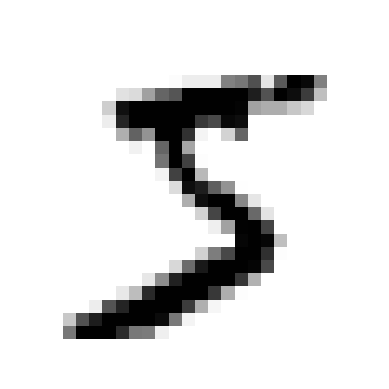

In [32]:
import matplotlib.pyplot as plt
import matplotlib.cm  as cm

image = mnist.data.values[0] # Get the first point in the dataset
image = image.reshape(28,28) # Reshape into its image form

plt.imshow(image,cmap=cm.binary)
plt.axis('off')

You can check the corresponding target for your self. You will use this dataset for the remainder of this week to practise generating ROC curves and evaluating the performance of your classification models.



## California Housing Dataset

For regression, we will work with another dataset that is built into sklearn: the California housing dataset. This datset is derived from the 1990 U.S. census, which comprises house prices grouped by block group (the smallest geographical unit used by the US Census Bureau, typically 600-3000 people) and 8 features for each sample. 

Further details can be found in the `sklearn` [User Guide](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). You are encouraged to take a look at this, as it explains exactly what each of the input features are. Much like the Iris dataset you saw in the Week 5 notebook, it is easy to import:

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

The target for this dataset is the median house value in a given block group. As always, it is important to visualise our dataset before we start with any ML. You can see the ```scatter_matrix``` below. As a quick refresher on ```scatter_matrix```, the plots on the line from the top left to the bottom right are the histograms of the relevant quantities, whereas the rest of the plots are scatter plots of each quantity against the other. 

<div>
<img src=Week6_plots/california_housing_scatter_matrix_final.png align="center" width=800>
</div>

Compared to the Iris dataset we saw in Week 5, we have significantly more features, which in turn increases the complexity of the dataset. The scatter point color denotes the value of the target, the median house value (in units of $100,000). 

## Summary

In this section, you have been introduced to the MNIST dataset and California Housing datasets, two famous datasets for classification and regression methods respectively. 

The following section will cover the exercises for you to work through this week.

<hr style="border:2px solid gray">

# Section Five: Exercises [^](#outline) <a id='section-5'></a>



## MNIST

<div style="background-color:#C2F5DD">

### Exercise 1

Explore the MNIST dataset. This includes:

* Print the dataset description
* Visualise one of each of the classes using ```imshow```
* Visualise several training points simulataneously, e.g. in a 4 x 4 array of plots

In [33]:
# Your visualisation code here

print(mnist.DESCR)


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

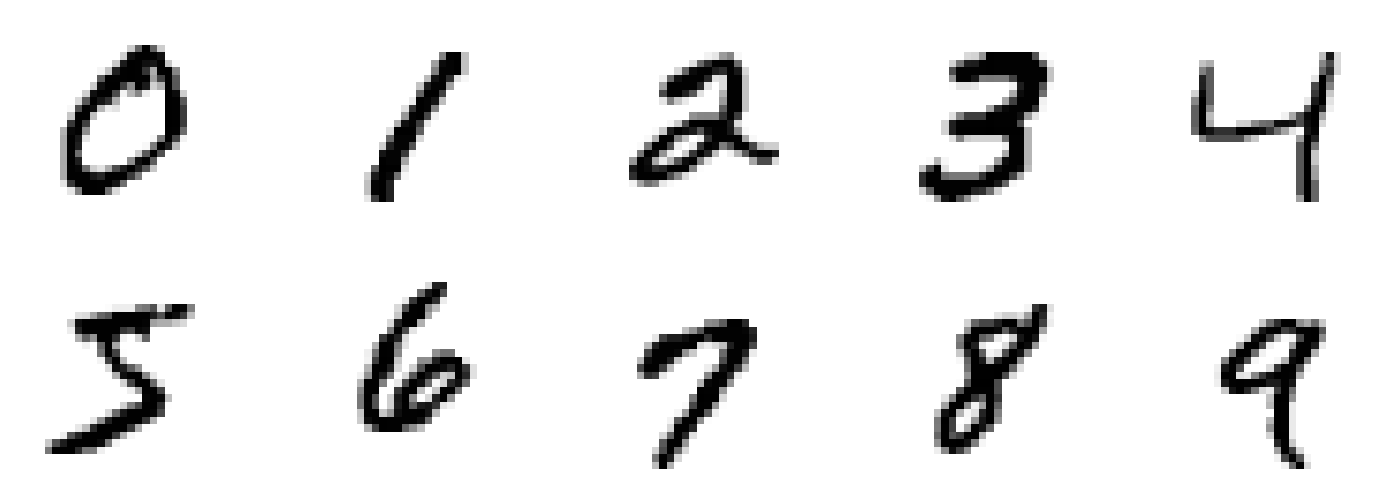

In [34]:
import matplotlib.cm as cm

fig, ax = plt.subplots(2,5,figsize = (12, 4), dpi = 150)

for i in range(2):
    for j in range(5):
        index = np.where(mnist['target']==str(i*5+j))[0][0] # Get index of 
        ax[i,j].imshow(mnist['data'].iloc[index].values.reshape(28,28), cmap = cm.binary)
        ax[i,j].axis('off')


<div style="background-color:#C2F5DD">

The MNIST dataset is a multiclass classification problem. We however will restrict ourselves to binary classification; sklearn's ```SVC``` is capable of multiclass classification, which is done through a one-vs-one scheme, i.e. an independent classifier is trained for every pair of classes. For any prediction point, each classifier is used to predict that point and the class predicted by the greatest number of classifiers is chosen for the prediction point.

To construct a binary classification problem, we must pick one class we are interested in identifying, e.g. identifying a handwritten 5, and we assign that as the positive class. To do this, we must manually create a target.

<div style="background-color:#C2F5DD">

### Exercise 2

Create a target for a binary classification problem, to identify whether a digit is a 5 or not. Your target should have 0 (or -1) corresponding to an input that is **not** a 5, and 1 for inputs that are a 5. 

Make sure your target is an array of integers.

In [35]:
# Your code here

X = mnist['data']
target = mnist['target']

y = np.zeros(len(target))
y[target=='5'] = 1 # Target array of 0 where it is not a '5', and 1 where it is a '5'

## ROC-AUC for MNIST

<div style="background-color:#C2F5DD">

### Exercise 3

Using the MNIST dataset, train a linear SVM classifier to determine if a given digit is a 5 or not.  Remember the following steps:

* Divide your dataset into training and test sets
* Use ```LinearSVC``` for speed; see the bonus SVM notebook for details of how this works
* Define your hyperparameters
* Fit your model

Find your ROC curve and ROC-AUC score on the test data.

In [36]:
# Define training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [37]:
# Define hyperparameters

C = 100

In [38]:
# Define and fit your model

from sklearn.svm import LinearSVC

svc = LinearSVC(C = C)
svc.fit(X_train, y_train)

C:\Users\Nick\miniconda3\envs\ML_env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Nick\miniconda3\envs\ML_env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100)

In [39]:
# Calculate prediction and scores on test data

from sklearn.metrics import accuracy_score

y_pred = svc.predict(X_test)

y_score = svc.decision_function(X_test)

acc = accuracy_score(y_pred, y_test)

print('Classification accuracy = {:.1f}%'.format(acc*100))

Classification accuracy = 95.8%


Text(0.5, 1.0, 'ROC-AUC for MNIST \n with a linear kernel')

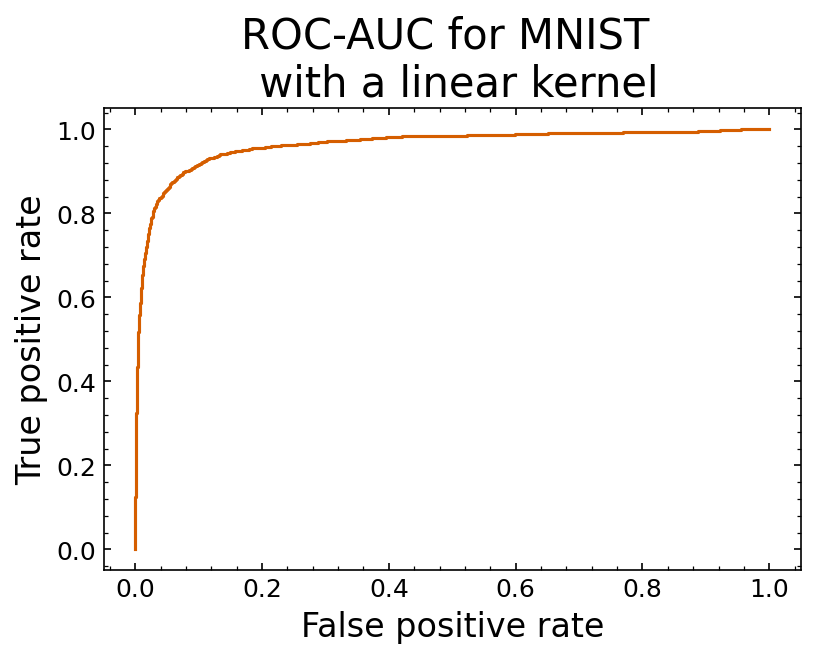

In [40]:
# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
ax.plot(fpr, tpr, color='#D55E00')
ax.set_xlabel('False positive rate',fontsize = 16)
ax.set_ylabel('True positive rate',fontsize = 16)
ax.xaxis.set_minor_locator(MultipleLocator(0.04))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))
ax.tick_params(which='both',labelsize = 12, direction='in',top=True,right=True)
ax.set_title('ROC-AUC for MNIST \n with a linear kernel',fontsize = 20)

In [41]:
# Calculate ROC-AUC score

auc_score = roc_auc_score(y_test, y_score)

print("ROC-AUC score = {:.3f}".format(auc_score))

ROC-AUC score = 0.963


Clearly, after making this a binary problem we can do pretty well using a linear kernel. Not only is our classification accuracy good, but so is our ROC-AUC score.

<div style="background-color:#C2F5DD">


Although we have managed to use ```LinearSVC``` to train a linear SVM to classify the MNIST dataset, if we were to try using the generic ```SVC``` you will find it takes a lot longer to run. Instead of getting you to optimise hyperparameters on the whole dataset, we will instead generate a subset of MNIST with each class represented 100 times. You can then fit a model this subset and predict on the rest of the data.

In [42]:
import numpy as np

X = mnist['data'].values
target = mnist['target'].values.astype(int)

np.random.seed(1)
train_inds = np.concatenate([np.random.choice(np.where(target==i)[0],size = 100, replace = False) for i in range(10)])

# Now the test set is all the rest of the data, i.e. all indices not in the list of training indices
test_inds = np.arange(len(X))[~np.isin(np.arange(len(X)),train_inds)] 

y = np.zeros(len(X))
y[target==5] = 1
y = y.astype(int)

X_train, y_train = X[train_inds], y[train_inds]
X_test, y_test = X[test_inds], y[test_inds]

<div style="background-color:#C2F5DD">

### Exercise 4

Using this subset of the MNIST dataset and the sklearn ```SVC``` class, try experimenting with different hyperparameters to get the best possible ROC-AUC score you can on the full dataset. Remember the following steps:

* Vary the `SVC` hyperparameters `kernel` and `C`
* Fit your model
* Predict on the test data

Find your ROC curve and ROC-AUC score on the test data.

Remember to record the ROC-AUC score for each combination of parameters.

We will go straight to trying a few different SVC hyperparameter sets like we did in the example earlier. Feel free to try any combinations of hyperparameters you like. This list is by no means comprehensive and in any real ML task you would want to try more hyperparameters than this. For illustrative purposes we will still try a polynomial kernel here, although this will take a long time to run.

In [43]:
# In order: (kernel, C, degree, gamma, coef0)

list_of_hparams = [('poly', 100, 4, 'scale', 0),
                   ('poly', 100, 2, 'scale', 0),
                   ('poly', 100, 3, 'scale', 0),
                   ('poly', 100, 8, 'scale', 0),
                   ('rbf', 100, 3, 'scale', 0),
                   ('sigmoid', 100, 3, 'scale', 0)]

best_auc_score = 0

results_df = pd.DataFrame(columns=['kernel','C','degree','gamma','coef0','accuracy','ROC-AUC score'])

for kernel, C, degree, gamma, coef0 in list_of_hparams:
    mnist_svc = SVC(kernel = kernel, C = C, degree = degree, gamma = gamma, coef0 = coef0)
    mnist_svc.fit(X_train, y_train)
    y_pred = mnist_svc.predict(X_test)
    y_score = mnist_svc.decision_function(X_test)
    acc = accuracy_score(y_pred, y_test)
    auc_score = roc_auc_score(y_test, y_score)
    model_df = pd.DataFrame(np.array([[kernel, C, degree, gamma, coef0, acc, auc_score]]),
                            columns=results_df.columns)
    results_df = pd.concat([results_df, model_df])
    if auc_score > best_auc_score:
        best_auc_score = auc_score
        with open('MNIST_svm.pkl','wb') as f:
            pickle.dump(mnist_svc, f)
    


We can also quickly plot the ROC curve of the best performing model and calculate the ROC-AUC score:


ROC-AUC score = 0.989


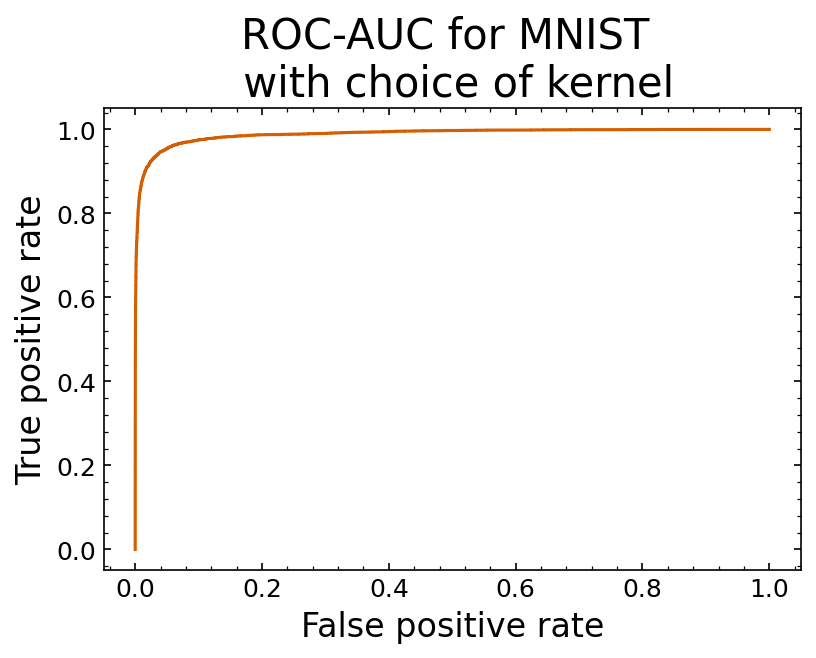

In [44]:
with open('MNIST_svm.pkl','rb') as f:
    model = pickle.load(f)
    
y_score = model.decision_function(X_test)

# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
ax.plot(fpr, tpr, color='#D55E00')
ax.set_xlabel('False positive rate',fontsize = 16)
ax.set_ylabel('True positive rate',fontsize = 16)
ax.xaxis.set_minor_locator(MultipleLocator(0.04))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))
ax.tick_params(which='both',labelsize = 12, direction='in',top=True,right=True)
ax.set_title('ROC-AUC for MNIST \n with choice of kernel',fontsize = 20)

auc_score = roc_auc_score(y_test, y_score)
print('ROC-AUC score = {:.3f}'.format(auc_score))

## California Housing

We will first start by investigating the California Housing dataset to understand the dataset. The first of these exercises is also in the bonus SVM notebook but is reproduced here.

<div style="background-color:#C2F5DD">

### Exercise 5

Visualise the California housing dataset. You could do this using ```scatter_matrix```, for example, or any method of your choice.

Write short answers to the following questions:

* Do any features appear to correlate well with the target?
* Any first ideas as to what kind of model might work with this data?
* Is the target approximately linear in any of the features?

As well as using scatter matrix, it is useful to visualise the data as a series of plots of input features vs the target to look for any obvious correlations. 

In [1]:
# Visualise the data

from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing(as_frame = True)

cf_housing_df = california_housing.frame

We've added some extra code here to improve the formatting of the scatter matrix. In particular, we want to:

* Improve fontsize of axis labels and tick labels
* Add a colorbar to indicate the target


C:\Users\ac5222\AppData\Local\Temp\ipykernel_14168\351720847.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plots[0,0].yaxis.set_ticklabels(plots[-1][0].get_xticks().astype(int).astype(str))


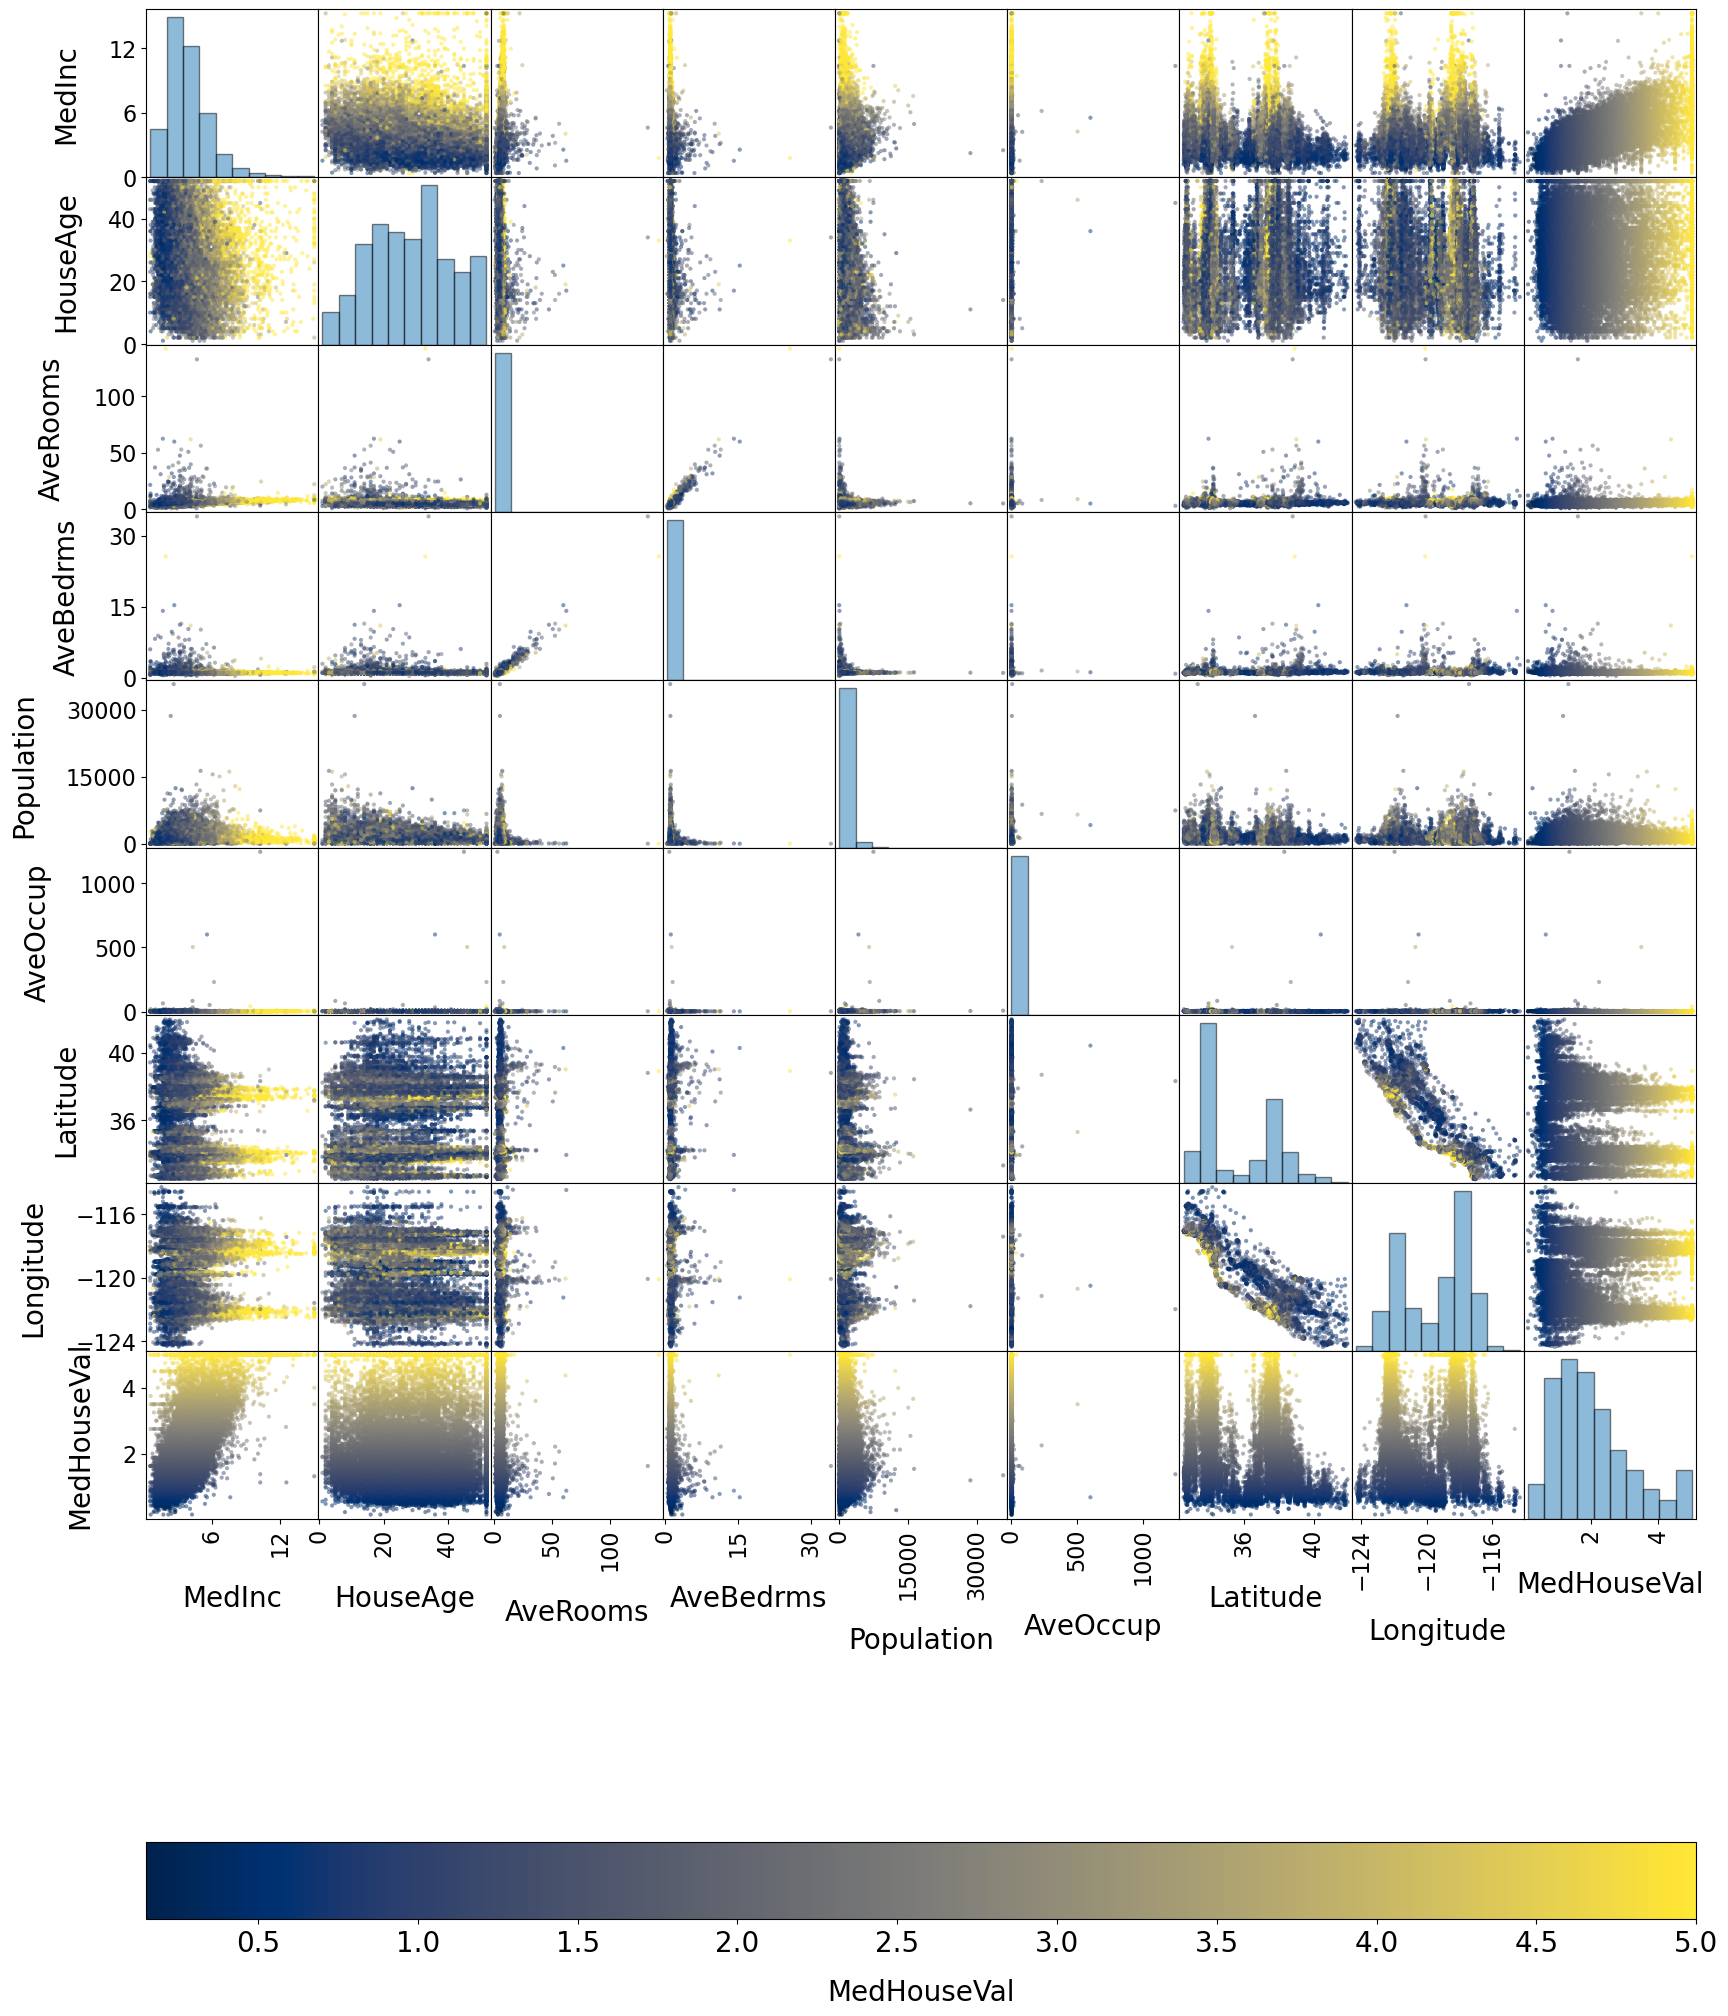

In [2]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from matplotlib.ticker import MaxNLocator, MultipleLocator

plots = pd.plotting.scatter_matrix(cf_housing_df, c = california_housing.target, figsize = (20,28), hist_kwds={'edgecolor':'black','alpha':0.5}, cmap = cm.cividis)
sm = cm.ScalarMappable(mcolor.Normalize(vmin = np.min(california_housing.target),vmax = np.max(california_housing.target)),cmap = cm.cividis)
for ax in plots.ravel():
    ax.set_xlabel(ax.get_xlabel(),fontsize = 20, labelpad = 20)
    ax.set_ylabel(ax.get_ylabel(),fontsize = 20, labelpad = 20)
    ax.tick_params(which='both',labelsize = 16)
    ax.xaxis.set_major_locator(MaxNLocator(3))
    ax.yaxis.set_major_locator(MaxNLocator(3))
plots[0,0].yaxis.set_ticklabels(plots[-1][0].get_xticks().astype(int).astype(str))
cbar = plt.gcf().colorbar(sm,ax = plots.ravel().tolist(),location = 'bottom',orientation='horizontal')
cbar.ax.tick_params(labelsize = 20)
cbar.ax.xaxis.set_major_locator(MaxNLocator(10))
cbar.set_label(california_housing.target_names[0],fontsize = 20,labelpad = 15)

One subplot here of interest is the latitude-longitude plot, which is in the shape of California state and shows the highest median values along the west coast, which corresponds to where the biggest/most expensive cities in California are (e.g. Los Angeles, San Jose, San Diego, San Francisco).

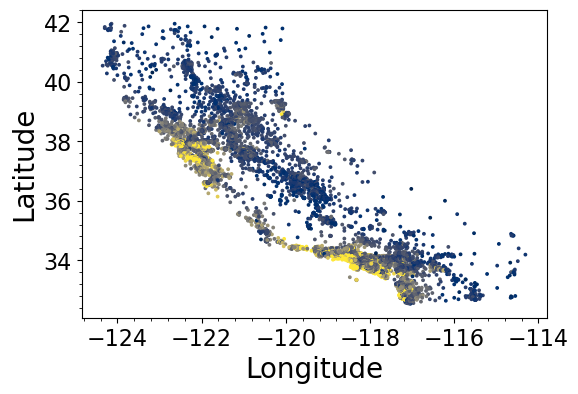

In [3]:
fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 100)
ax.scatter(cf_housing_df['Longitude'],cf_housing_df['Latitude'],c = cf_housing_df['MedHouseVal'],cmap = cm.cividis,s = 3)
ax.set_xlabel('Longitude',fontsize = 20)
ax.set_ylabel('Latitude',fontsize = 20)
ax.tick_params(labelsize = 16)
ax.xaxis.set_minor_locator(MultipleLocator(0.4))
ax.yaxis.set_minor_locator(MultipleLocator(0.4))


We will also plot 2D histograms of each input feature against each the target to look for any obvious correlations. We use histograms because we have many points and so if we did a scatter plot all the points would be overlapping, making it harder to discern any trends.

In [ ]:
fix, ax = plt.subplots(2,4,figsize = (36,24),dpi = 150)

for i in range(2):
    for j in range(4):
        _,_,_,art = ax[i,j].hist2d(cf_housing_df.iloc[:,4*i+j], cf_housing_df['MedHouseVal'],bins = (50,50),cmap = cm.cividis, norm = mcolor.LogNorm())
        ax[i,j].set_xlabel(cf_housing_df.columns[4*i+j],fontsize = 26)
        ax[i,j].set_ylabel('MedHouseVal [$100000]',fontsize = 26,labelpad = 20)
        ax[i,j].tick_params(labelsize = 20,length = 10, width = 2)
        ax[i,j].tick_params(which='minor',length = 4, width = 2)
        # Add minor ticks
        ax[i,j].yaxis.set_minor_locator(MultipleLocator(0.2))
        ax[i,j].xaxis.set_minor_locator(MultipleLocator(np.diff(ax[i,j].get_xticks())[0]/5))

# Add a colorbar for the frequency
cbar = plt.gcf().colorbar(art,ax = ax.ravel().tolist(),location = 'bottom',orientation='horizontal')
cbar.ax.tick_params(labelsize = 30,length = 10,which='major',width=2)
cbar.ax.tick_params(labelsize = 30,length = 6,which='minor',width=2)
cbar.set_label('Frequency',fontsize = 34,labelpad = 15)

* Do any features appear to correlate well with the target?

Looking at the second set of plots, we can see what input features have the biggest impact on the house value; the three input features that have the greatest effect on values of the target are the median income, latitude, and longitude. Average number of occupants seems to have very little impact on the median house value. 

It is difficult to see specific correlations for the house age, apart from maybe saying that newer houses in general have lower value. 


* Any first ideas as to what kind of model might work with this data?

It's hard to have any specific ideas as what kind of models would work, but for example we can quickly say that a linear kernel is unlikely to be very helpful. We might think some degree of polynomial kernel could work well because of the structure we see in the longitude and latitude relationships. 

* Is the target approximately linear in any of the features?

The closest to linear relationships are in the average number of rooms, average number of bedrooms, population and average number of occupants. In general, this dataset is non-linear but with no obvious relationships, so we will need to try different kernels and hyperparameter values etc. 

<div style="background-color:#C2F5DD">

### Exercise 6

Using the California housing dataset, train an SVR model with your choice of hyperparameters and calculate the following metrics:

* Your choice of MAE, MSE or RMSE; which do you think is most appropriate? Discuss with the person next to you. 
* $R^2$ score
* Goodness-of-fit using Kolmogorov-Smirnov
    
In `sklearn`, SVR training syntax is the same as for k-Nearest Neighbors for fitting and predicting. You can import `SVR` with the following line of code:

`from sklearn.svm import SVR`

HINT: consider using a scaler from `sklearn.preprocessing` due to the different scales of the California Housing input features.

**NOTE: use the `rbf` option for `kernel` as one of your hyperparameters, as other values can cause training to take an unfeasibly long time. In general, for large numbers of points, SVM methods can take a long time to train and do not scale well.**

We will use the same set of possible `rbf` kernel parameters as in the bonus SVM notebook. We will evaluate the RMSE, as this is of the same scale as the data, unlike MSE, but is differentiable, unlike MAE. 

In [45]:
# Load the dataset

from sklearn.datasets import fetch_california_housing

cf_housing = fetch_california_housing()

In [46]:
# Split into train and test datasets

X = cf_housing['data']
y = cf_housing['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [47]:
# Define your hyper parameters

kernel = 'rbf'
C = 10
epsilon = 0.6
gamma = 2.0

In [48]:
# Fit your model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

cf_svr = make_pipeline(RobustScaler(),
                       SVR(kernel = kernel, C = C, epsilon = epsilon, gamma = gamma))

cf_svr.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('svr', SVR(C=10, epsilon=0.6, gamma=2.0))])

In [49]:
# Calculate prediction on test data

y_pred = cf_svr.predict(X_test)

In [50]:
# Calculate metrics
# MAE, MSE or RMSE

rmse = root_mean_squared_error(y_test, y_pred)

# Coefficient of determination

r2 = r2_score(y_test, y_pred)

# Goodness of fit

ks_results = kstest(y_test, y_pred)

In [51]:
print('RMSE = {:.3f}'.format(rmse))
print('R2 score = {:.3f}'.format(r2))
print('KS statistic = {:.1f}, p-value = {}'.format(ks_results.statistic, ks_results.pvalue))

RMSE = 0.716
R2 score = 0.609
KS statistic = 0.2, p-value = 1.5592638961558607e-61


So for this model, our KS statistic is poor and our p-value rounds to 0. Our $R^2$ score suggests this model performs better than just predicting the mean of the test data, but with definite room for improvement, and our RMSE suggests we on average make an error of more than $80,000 on the price of the property that we predict. Clearly, we can do better. We will try with another set of hyperparameters, and provide some code for a loop as an example if you wish to run a more thorough hyperparameter search.

In [52]:
kernel = 'rbf'
C = 100
epsilon = 0.1
gamma = 2.0


cf_svr = make_pipeline(RobustScaler(),
                       SVR(kernel = kernel, C = C, epsilon = epsilon, gamma = gamma))

cf_svr.fit(X_train, y_train)

y_pred = cf_svr.predict(X_test)


rmse = root_mean_squared_error(y_test, y_pred)

# Coefficient of determination

r2 = r2_score(y_test, y_pred)

# Goodness of fit

ks_results = kstest(y_test, y_pred)

print('RMSE = {:.3f}'.format(rmse))
print('R2 score = {:.3f}'.format(r2))
print('KS statistic = {:.1f}, p-value = {}'.format(ks_results.statistic, ks_results.pvalue))

RMSE = 0.758
R2 score = 0.562
KS statistic = 0.1, p-value = 1.0469340057627371e-07


It is interesting to note that between these two, we have a worse RMSE for the second model but a better $R^2$ score and a better goodness of fit. This suggests that there are perhaps some outliers that are not predicted as well for the second model (resulting in a larger RMSE) but it better models the underlying distribution, thus improving the performance relative to predicting the mean i.e. the $R^2$ score, and improving the similarity between the empirical cumulative distributions i.e. the K-S test statistic. 

In general improvements in one metric will correlate with improvements in others, but there are situations where this is not the case and it is important to make a careful choice as to what metric you care the most about. 

You can run the loop below to try other hyperparameters, although particularly for high values of C it can take a long time to find an optimal solution.

In [ ]:
# Loop for rbf

list_of_C = [10, 1000]
list_of_eps = [0.2,0.6] # Small values because we are using RobustScaler
list_of_gamma = [0.25,0.5,1.0,2.0,4.0]

# Include degree and coef0 columns in case we also want to try polynomial kernels later
cf_housing_results_df = pd.DataFrame(columns = ['kernel','C','epsilon','gamma','test_rmse', 'r2_score','KS statistic','KS p-value'])

best_rmse = 10000


list_of_hparams = [(C,e,g) for C in list_of_C for e in list_of_eps for g in list_of_gamma]
for C, epsilon, gamma in list_of_hparams:
    # Define the model
    svr_model = make_pipeline(RobustScaler(),
                              SVR(kernel='rbf',epsilon = epsilon, C = C, gamma = gamma))
    # Fit the model
    svr_model.fit(X_train, y_train)
    # Predict test data
    y_pred = svr_model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    ks_results = kstest(y_test, y_pred)
    # Record results in DataFrame
    model_df = pd.DataFrame([['rbf',C,epsilon,gamma, rmse, r2, ks_results.statistic, ks_results.pvalue]],
                            columns=cf_housing_results_df.columns)
    cf_housing_results_df = pd.concat([cf_housing_results_df, model_df])
    # Save best model
    if rmse<best_rmse:
        best_test_rmse_rbf = rmse
        with open('best_cf_housing_svr_week6.pkl','wb') as f:
            pickle.dump(svr_model,f)